
Dataset Overview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  Setosa  
1  Setosa  
2  Setosa  
3  Setosa  
4  Setosa  

Missing Values After Imputation:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

🔹 Decision Tree Classifier Performance:
Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00  

/var/folders/kp/fgs9sll91rx2b_jlb118392m0000gn/T/ipykernel_60808/2552769776.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="cool")


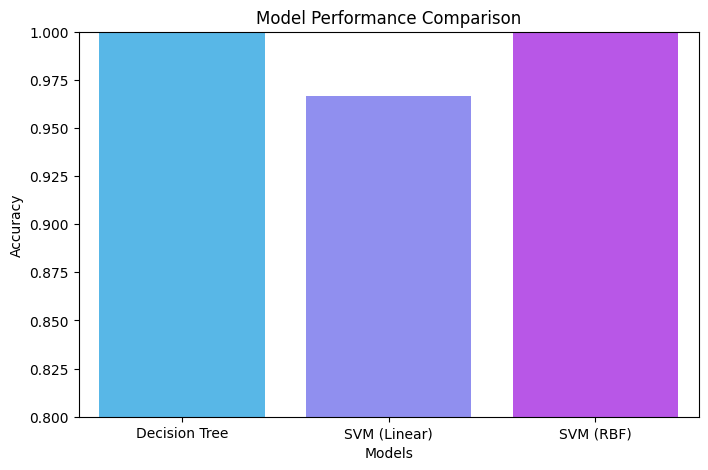

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

species_mapping = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
df['species'] = df['species'].map(species_mapping)

print("\nDataset Overview:")
print(df.head())

df.iloc[5, 1] = np.nan

df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

print("\nMissing Values After Imputation:\n", df.isnull().sum())

X = df.drop("species", axis=1)  
y = df["species"]  

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\n🔹 Decision Tree Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

svm_linear = SVC(kernel="linear", random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_svm_linear = svm_linear.predict(X_test)

print("\n🔹 SVM Classifier (Linear Kernel) Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_linear))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_linear))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_linear))

svm_rbf = SVC(kernel="rbf", random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)

print("\n🔹 SVM Classifier (RBF Kernel) Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_rbf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_rbf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_rbf))

models = ['Decision Tree', 'SVM (Linear)', 'SVM (RBF)']
accuracies = [accuracy_score(y_test, y_pred_dt), 
              accuracy_score(y_test, y_pred_svm_linear), 
              accuracy_score(y_test, y_pred_svm_rbf)]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette="cool")
plt.ylim(0.8, 1.0)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()